Cuisine Intelligence & Restaurant Positioning Analysis using String Processing and Exploratory Data Analysis

Food delivery platforms and restaurant aggregators struggle to correctly classify cuisines due to inconsistent, noisy, and multi-valued cuisine text data. This leads to inaccurate recommendations, poor cuisine-based filtering, and misleading insights for business decisions.
This project aims to use string analysis and exploratory data analysis to clean, standardize, and extract meaningful cuisine patterns from restaurant datasets at both city-level (Gwalior) and pan-India level, and study how cuisine representation impacts ratings and pricing.

In [2]:
import pandas as pd

In [ ]:
gwl_data = pd.read_csv(r'C:\Users\Shreya Marathe\Desktop\Project\Restaurant-Data-Analysis-Cuisine-Segmentation\output\zomato_gwl.csv')
ind_data = pd.read_csv(r'C:\Users\Shreya Marathe\Desktop\Project\Restaurant-Data-Analysis-Cuisine-Segmentation\output\indian_restaurants.csv')

In [9]:
gwl_data.head()

,name,cuisine,link,main_cuisine,rating,cost
0,Molecule,"Asian, Chinese, Bar Food",https://www.zomato.com/gwalior/molecule-lashka...,Asian,4.4,1000
1,Kwality Restaurant,"North Indian, Chinese, Continental, Biryani, D...",https://www.zomato.com/gwalior/kwality-restaur...,North Indian,4.8,700
2,Muscle Vision Nutrition,"Continental, North Indian, Chinese, Sandwich, ...",https://www.zomato.com/gwalior/muscle-vision-n...,Continental,3.5,450
3,Starbucks Coffee,"Cafe, Beverages, Coffee",https://www.zomato.com/gwalior/starbucks-coffe...,Cafe,4.4,900
4,Xero Degrees,"Pizza, Fast Food, Chinese, Burger, Sandwich, I...",https://www.zomato.com/gwalior/xero-degrees-ci...,Pizza,4.0,450


In [10]:
gwl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          501 non-null    object 
 1   cuisine       501 non-null    object 
 2   link          501 non-null    object 
 3   main_cuisine  501 non-null    object 
 4   rating        348 non-null    float64
 5   cost          501 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB


In [11]:
ind_data.head()

,name,location,locality,city,cuisine,rating,votes,cost,main_cuisine
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,North Indian
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,North Indian
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,Finger Food
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,North Indian
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,Mexican


In [12]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          6593 non-null   object 
 1   location      6593 non-null   object 
 2   locality      6593 non-null   object 
 3   city          6593 non-null   object 
 4   cuisine       6593 non-null   object 
 5   rating        6593 non-null   float64
 6   votes         6593 non-null   int64  
 7   cost          6593 non-null   int64  
 8   main_cuisine  6593 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 463.7+ KB


-------------------------------------------------------------------------------------------

In [13]:
gwl = gwl_data.copy()
ind = ind_data.copy()

In [14]:
gwl = gwl.dropna(subset=['rating'])

In [15]:
gwl.shape

(348, 6)

In [16]:
def clean_cuisine(text):
    return [c.strip().lower() for c in text.split(',')]

gwl['cuisine_list'] = gwl['cuisine'].apply(clean_cuisine)
ind['cuisine_list'] = ind['cuisine'].apply(clean_cuisine)


In [17]:
gwl['main_cuisine'] = gwl['main_cuisine'].str.strip().str.lower()
ind['main_cuisine'] = ind['main_cuisine'].str.strip().str.lower()

-----------------------------------------------------------------

In [ ]:
# 1️⃣ Regional Pricing Inequality Across Cuisines
#Does the same cuisine cost differently in different cities, reflecting regional economic inequality?

In [20]:
pricing_city_cuisine = (
    ind.groupby(['city', 'main_cuisine'])['cost']
    .mean()
    .reset_index()
)

pricing_variance = (
    pricing_city_cuisine
    .groupby('main_cuisine')['cost']
    .std()
    .sort_values(ascending=False)
)

pricing_variance.head(10)


main_cuisine
gujarati         999.674947
arabian          924.681310
turkish          888.819442
rajasthani       800.699694
hyderabadi       754.247233
oriental         703.562364
lebanese         666.145630
mediterranean    635.806574
thai             613.210230
parsi            611.010093
Name: cost, dtype: float64

In [ ]:
#2️⃣ Perception Gap Between Traditional & Modern Cuisines
#Are traditional cuisines underrated despite being affordable?

In [23]:
gwl['main_cuisine'].unique()

array(['asian', 'north indian', 'continental', 'cafe', 'pizza', 'biryani',
       'chinese', 'burger', 'bar food', 'bakery', 'fast food',
       'south indian', 'sandwich', 'waffle', 'mithai', 'momos',
       'street food', 'healthy food', 'ice cream', 'coffee', 'beverages',
       'rajasthani', 'shawarma', 'rolls', 'bihari', 'tea', 'mughlai',
       'juices', 'desserts', 'pasta'], dtype=object)

In [24]:
ind['main_cuisine'].unique()

array(['north indian', 'finger food', 'mexican', 'multi-cuisine',
       'rajasthani', 'south indian', 'modern indian', 'world cuisine',
       'asian', 'italian', 'continental', 'chinese', 'mughlai', 'biryani',
       'street food', 'gujarati', 'desserts', 'fast food', 'european',
       'sizzlers', 'american', 'bakery and confectionary', 'seafood',
       'pizza', 'japanese', 'health food', 'thai', 'shakes', 'arabian',
       'mediterranean', 'nepalese', 'korean', 'naga', 'oriental',
       'indian cuisine', 'tibetan', 'coffee', 'turkish', 'bengali',
       'malaysian', 'singaporean', 'mithai', 'burger', 'lebanese',
       'vietnamese', 'african', 'goan', 'tea', 'spanish', 'juice',
       'parsi', 'ice cream', 'sindhi', 'maharashtrian', 'waffle',
       'kerala', 'barbecue', 'french', 'coastal', 'awadhi', 'drinks',
       'mangalorean', 'andhra', 'bihari', 'assamese', 'hyderabadi',
       'doughnuts', 'fusion', 'burmese', 'middle eastern', 'chettinad',
       'persian', 'afghani', 'b

In [57]:
traditional_indian = [
    'north indian', 'south indian', 'biryani', 'mughlai', 'indian cuisine', 'modern indian', 'multi-cuisine'
]

regional_indian = [
    'rajasthani', 'gujarati', 'bengali', 'goan', 'maharashtrian', 'sindhi', 'bihari', 'assamese', 'andhra', 'kerala',
    'chettinad', 'awadhi', 'hyderabadi', 'mangalorean', 'coastal', 'naga', 'parsi', 'south indian'
]

modern_global = [
    'italian', 'continental', 'european', 'french', 'american', 'mexican', 'asian', 'thai', 'japanese', 'korean', 'chinese','asian', 
    'oriental', 'cantonese', 'sushi', 'lebanese', 'turkish', 'arabian', 'middle eastern', 'mediterranean', 'persian', 'burmese',
    'afghani', 'vietnamese', 'malaysian', 'singaporean', 'spanish', 'british', 'african', 'world cuisine', 'seafood', 'nepalese', 'tibetan'
]

fast_food_casual = [
    'fast food', 'pizza', 'burger', 'sandwich', 'rolls', 'momos', 'shawarma', 'finger food', 'bar food', 'barbecue',
    'sizzlers', 'multi cuisine', 'fusion', 'street food', 'sushi', 'pasta'
]

desserts_beverages = [
    'desserts', 'mithai', 'ice cream', 'bakery', 'bakery and confectionary', 'waffle', 'doughnuts',
    'coffee', 'tea', 'beverages', 'drinks', 'shakes', 'juice', 'juices', 'healthy food', 'health food' , 'cafe'
]


In [58]:
def map_cuisine_category(cuisine):

    for item in traditional_indian:
        if item in cuisine:
            return 'Traditional Indian'
    
    for item in regional_indian:
        if item in cuisine:
            return 'Regional Indian'
    
    for item in modern_global:
        if item in cuisine:
            return 'Modern / Global'
    
    for item in fast_food_casual:
        if item in cuisine:
            return 'Fast Food & Casual'
    
    for item in desserts_beverages:
        if item in cuisine:
            return 'Desserts & Beverages'
    
    return 'Other'


In [59]:
gwl['cuisine_category'] = gwl['main_cuisine'].apply(map_cuisine_category)
ind['cuisine_category'] = ind['main_cuisine'].apply(map_cuisine_category)


In [60]:
print("Gwalior cuisine categories:\n")
print(gwl['cuisine_category'].value_counts(), "\n")

print("India cuisine categories:\n")
print(ind['cuisine_category'].value_counts())


Gwalior cuisine categories:

cuisine_category
Traditional Indian      167
Fast Food & Casual       99
Desserts & Beverages     44
Modern / Global          36
Regional Indian           2
Name: count, dtype: int64 

India cuisine categories:

cuisine_category
Traditional Indian      2506
Modern / Global         1653
Fast Food & Casual      1627
Desserts & Beverages     675
Regional Indian          132
Name: count, dtype: int64


In [61]:
perception_analysis = (
    ind.groupby('cuisine_category')
    .agg(
        avg_rating=('rating', 'mean'),
        avg_cost=('cost', 'mean'),
        restaurant_count=('name', 'count')
    )
    .reset_index()
)

perception_analysis


,cuisine_category,avg_rating,avg_cost,restaurant_count
0,Desserts & Beverages,4.006815,483.925926,675
1,Fast Food & Casual,4.074985,1102.550707,1627
2,Modern / Global,4.194858,1228.160315,1653
3,Regional Indian,4.048485,1020.454545,132
4,Traditional Indian,4.050439,1191.300878,2506


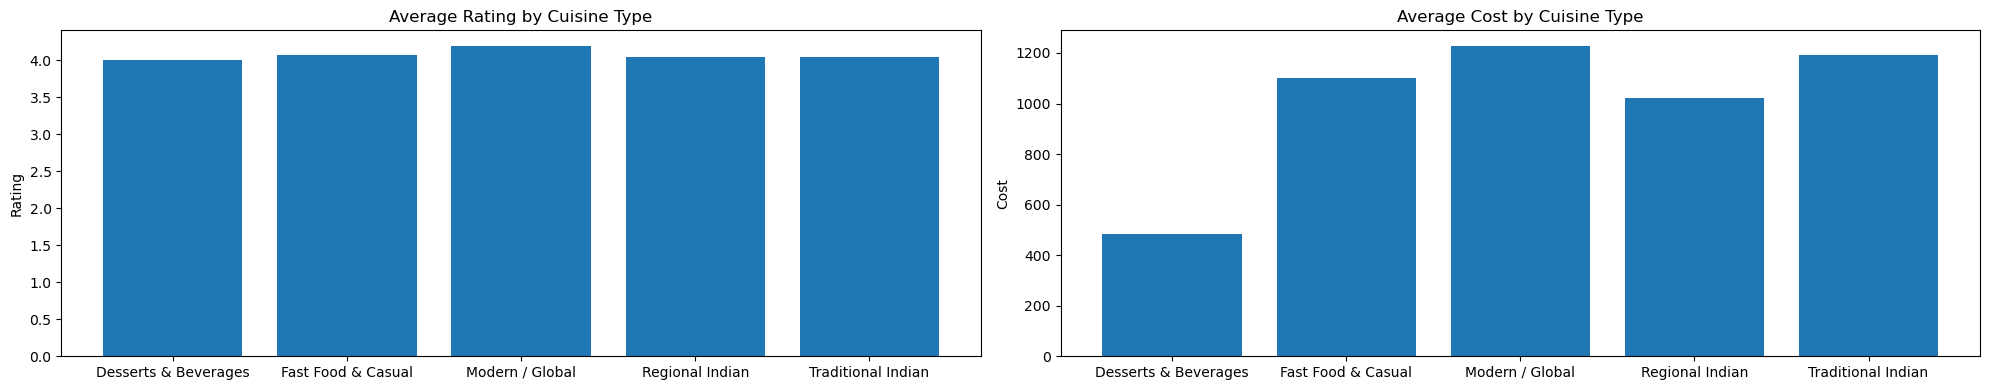

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.bar(perception_analysis['cuisine_category'], perception_analysis['avg_rating'])
plt.title('Average Rating by Cuisine Type')
plt.ylabel('Rating')

plt.subplot(1,2,2)
plt.bar(perception_analysis['cuisine_category'], perception_analysis['avg_cost'])
plt.title('Average Cost by Cuisine Type')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()


In [ ]:
#3️⃣ Vote Distribution Bias by Cuisine Type
#Do popular cuisines get more votes regardless of quality?

In [63]:
vote_analysis = (
    ind.groupby('cuisine_category')
    .agg(
        avg_votes=('votes', 'mean'),
        avg_rating=('rating', 'mean'),
        restaurant_count=('name', 'count')
    )
    .reset_index()
)

vote_analysis


,cuisine_category,avg_votes,avg_rating,restaurant_count
0,Desserts & Beverages,15.945185,4.006815,675
1,Fast Food & Casual,142.345421,4.074985,1627
2,Modern / Global,122.366606,4.194858,1653
3,Regional Indian,85.598485,4.048485,132
4,Traditional Indian,132.245411,4.050439,2506


In [64]:
vote_analysis['votes_per_restaurant'] = (
    vote_analysis['avg_votes'] / vote_analysis['restaurant_count']
)

vote_analysis


,cuisine_category,avg_votes,avg_rating,restaurant_count,votes_per_restaurant
0,Desserts & Beverages,15.945185,4.006815,675,0.023622
1,Fast Food & Casual,142.345421,4.074985,1627,0.087490
2,Modern / Global,122.366606,4.194858,1653,0.074027
3,Regional Indian,85.598485,4.048485,132,0.648473
4,Traditional Indian,132.245411,4.050439,2506,0.052772


In [68]:
vote_analysis['total_votes'] = (
    vote_analysis['avg_votes'] * vote_analysis['restaurant_count']
)


In [69]:
total_votes = vote_analysis['total_votes'].sum()
total_restaurants = vote_analysis['restaurant_count'].sum()

vote_analysis['vote_share_pct'] = (
    vote_analysis['total_votes'] / total_votes * 100
)

vote_analysis['restaurant_share_pct'] = (
    vote_analysis['restaurant_count'] / total_restaurants * 100
)


In [71]:
vote_analysis['vote_share_pct']

0     1.367013
1    29.415104
2    25.690651
3     1.435091
4    42.092141
Name: vote_share_pct, dtype: float64

In [70]:
vote_analysis['vote_bias_pct'] = (
    vote_analysis['vote_share_pct'] - vote_analysis['restaurant_share_pct']
)

vote_analysis[['cuisine_category','vote_share_pct',
               'restaurant_share_pct','vote_bias_pct']]


,cuisine_category,vote_share_pct,restaurant_share_pct,vote_bias_pct
0,Desserts & Beverages,1.367013,10.238131,-8.871118
1,Fast Food & Casual,29.415104,24.677688,4.737416
2,Modern / Global,25.690651,25.072046,0.618605
3,Regional Indian,1.435091,2.002123,-0.567033
4,Traditional Indian,42.092141,38.010011,4.082130


In [73]:
vote_analysis.sort_values(
    by='vote_bias_pct',
    ascending=False
)

,cuisine_category,avg_votes,avg_rating,restaurant_count,votes_per_restaurant,total_votes,vote_share_pct,restaurant_share_pct,vote_bias_pct
1,Fast Food & Casual,142.345421,4.074985,1627,0.087490,231596.0,29.415104,24.677688,4.737416
4,Traditional Indian,132.245411,4.050439,2506,0.052772,331407.0,42.092141,38.010011,4.082130
2,Modern / Global,122.366606,4.194858,1653,0.074027,202272.0,25.690651,25.072046,0.618605
3,Regional Indian,85.598485,4.048485,132,0.648473,11299.0,1.435091,2.002123,-0.567033
0,Desserts & Beverages,15.945185,4.006815,675,0.023622,10763.0,1.367013,10.238131,-8.871118


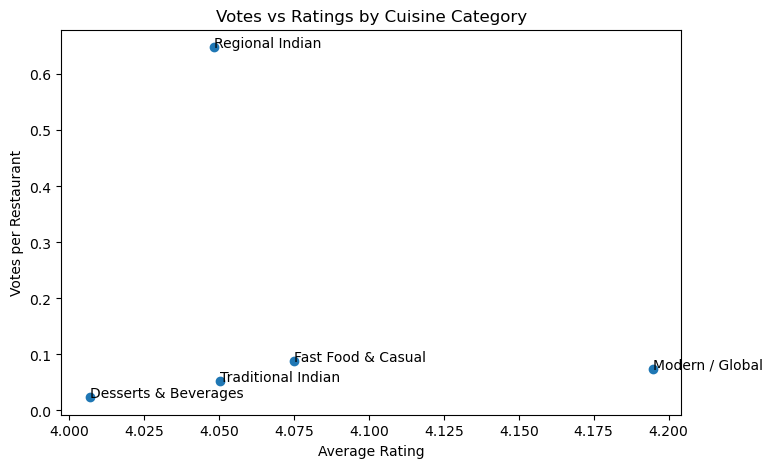

In [67]:
plt.figure(figsize=(8,5))
plt.scatter(
    vote_analysis['avg_rating'],
    vote_analysis['votes_per_restaurant']
)

for i, txt in enumerate(vote_analysis['cuisine_category']):
    plt.annotate(txt, 
                 (vote_analysis['avg_rating'][i],
                  vote_analysis['votes_per_restaurant'][i]))

plt.xlabel('Average Rating')
plt.ylabel('Votes per Restaurant')
plt.title('Votes vs Ratings by Cuisine Category')
plt.show()


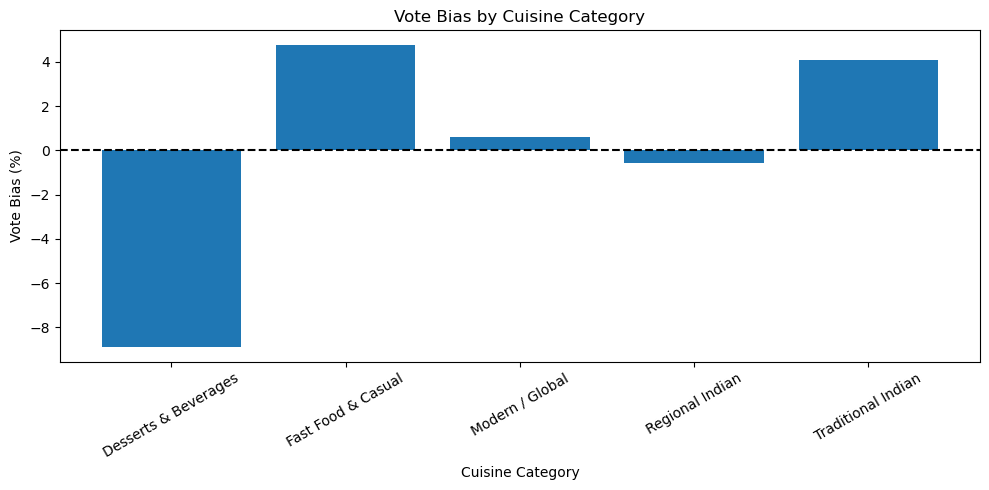

In [74]:
plt.figure(figsize=(10,5))

plt.bar(
    vote_analysis['cuisine_category'],
    vote_analysis['vote_bias_pct']
)

plt.axhline(0, color='black', linestyle='--')

plt.title('Vote Bias by Cuisine Category')
plt.ylabel('Vote Bias (%)')
plt.xlabel('Cuisine Category')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


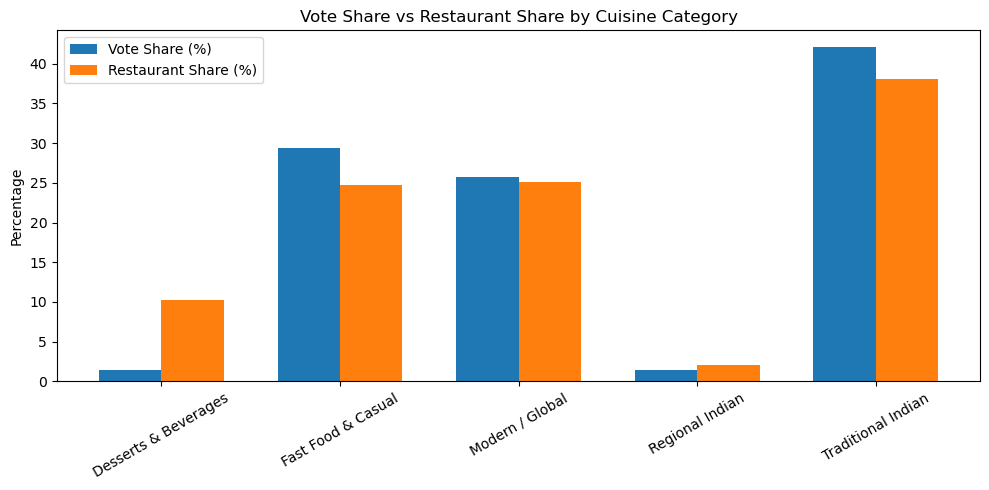

In [76]:
import numpy as np
x = np.arange(len(vote_analysis))
width = 0.35

plt.figure(figsize=(10,5))

plt.bar(x - width/2, vote_analysis['vote_share_pct'],
        width, label='Vote Share (%)')

plt.bar(x + width/2, vote_analysis['restaurant_share_pct'],
        width, label='Restaurant Share (%)')

plt.xticks(x, vote_analysis['cuisine_category'], rotation=30)
plt.ylabel('Percentage')
plt.title('Vote Share vs Restaurant Share by Cuisine Category')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#4️⃣ Long-Tail Cuisine Visibility Problem
#Which cuisines are hidden despite good quality?

In [88]:
cuisine_frequency = (
    ind['main_cuisine']
    .value_counts()
    .reset_index()
)

cuisine_frequency.columns = ['main_cuisine', 'restaurant_count']
cuisine_frequency.head(20)


,main_cuisine,restaurant_count
0,north indian,2228
1,multi cuisine,659
2,fast food,598
3,italian,457
4,chinese,379
5,desserts,360
6,continental,260
7,south indian,197
8,finger food,157
9,asian,118


In [89]:
long_tail_cuisines = cuisine_frequency[
    cuisine_frequency['restaurant_count'] < 60
]['main_cuisine']


In [97]:
long_tail_analysis = (
    ind[ind['main_cuisine'].isin(long_tail_cuisines)]
    .groupby('main_cuisine')
    .agg(
        restaurant_count=('name', 'count'),
        avg_rating=('rating', 'mean')
    )
    .reset_index()
    .sort_values(by='avg_rating', ascending=False)
)

long_tail_analysis



,main_cuisine,restaurant_count,avg_rating
9,bihari,1,4.90
14,cantonese,1,4.80
38,middle eastern,3,4.60
53,sushi,1,4.60
1,african,1,4.50
...,...,...,...
56,tibetan,12,3.75
36,mangalorean,2,3.65
15,chettinad,1,3.60
51,sizzlers,6,3.55


In [99]:
hidden_gems = long_tail_analysis[
    long_tail_analysis['avg_rating'] >= 4.4
]

hidden_gems


,main_cuisine,restaurant_count,avg_rating
9,bihari,1,4.900000
14,cantonese,1,4.800000
38,middle eastern,3,4.600000
53,sushi,1,4.600000
1,african,1,4.500000
32,korean,4,4.500000
35,malaysian,1,4.500000
28,indian cuisine,3,4.433333
12,burger,7,4.428571
55,thai,15,4.426667


In [100]:
hidden_gem_cuisines = hidden_gems['main_cuisine'].tolist()
hidden_gem_cuisines


['bihari',
 'cantonese',
 'middle eastern',
 'sushi',
 'african',
 'korean',
 'malaysian',
 'indian cuisine',
 'burger',
 'thai',
 'burmese',
 'vietnamese']

In [104]:
hidden_gem_restaurants = (
    ind[ind['main_cuisine'].isin(hidden_gem_cuisines)]
    [['name', 'city', 'main_cuisine', 'rating', 'votes', 'cost']]
    .sort_values(by=['votes', 'rating'], ascending=[False, False])
)

hidden_gem_restaurants.head(7)


,name,city,main_cuisine,rating,votes,cost
904,Nando's,Gurgaon,african,4.5,475,2000
592,Thai High,Delhi,thai,4.4,400,2000
1886,ASEAN - On The Edge,Bangalore,thai,4.4,265,1800
2928,Benjarong,Chennai,thai,4.6,234,2000
271,Ziu,Delhi,thai,4.4,232,1500
593,Jom Jom Malay,Delhi,malaysian,4.5,209,1500
856,VietNom,Gurgaon,vietnamese,4.4,209,2500


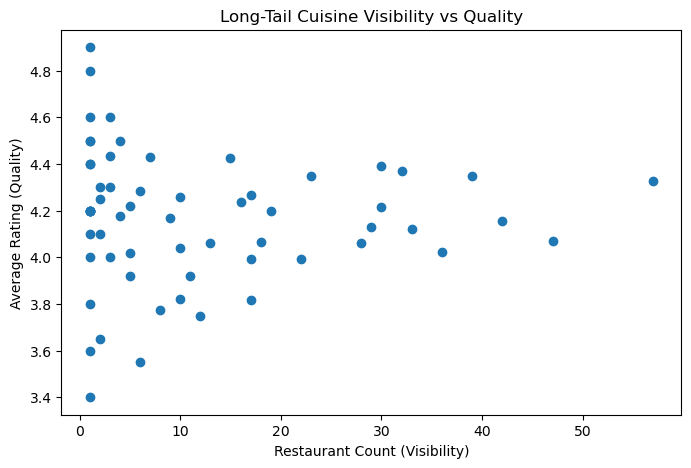

In [95]:
plt.figure(figsize=(8,5))
plt.scatter(
    long_tail_analysis['restaurant_count'],
    long_tail_analysis['avg_rating']
)

plt.xlabel('Restaurant Count (Visibility)')
plt.ylabel('Average Rating (Quality)')
plt.title('Long-Tail Cuisine Visibility vs Quality')
plt.show()


------------------------------------------------------------------------------------

In [105]:
gwl_cuisine_freq = (
    gwl['main_cuisine']
    .value_counts()
    .reset_index()
)

gwl_cuisine_freq.columns = ['main_cuisine', 'restaurant_count']
gwl_cuisine_freq


,main_cuisine,restaurant_count
0,north indian,151
1,fast food,38
2,pizza,29
3,chinese,24
4,bakery,15
5,burger,11
6,south indian,11
7,mithai,10
8,street food,9
9,cafe,8


In [106]:
gwl_long_tail_cuisines = gwl_cuisine_freq[
    gwl_cuisine_freq['restaurant_count'] <= 4
]['main_cuisine']


In [107]:
gwl_long_tail_analysis = (
    gwl[gwl['main_cuisine'].isin(gwl_long_tail_cuisines)]
    .groupby('main_cuisine')
    .agg(
        restaurant_count=('name', 'count'),
        avg_rating=('rating', 'mean')
    )
    .reset_index()
    .sort_values(by='avg_rating', ascending=False)
)

gwl_long_tail_analysis


,main_cuisine,restaurant_count,avg_rating
0,asian,1,4.400000
10,mughlai,1,4.200000
14,sandwich,3,4.033333
1,bar food,1,4.000000
3,biryani,4,3.925000
6,desserts,1,3.900000
13,rolls,2,3.850000
15,shawarma,1,3.800000
4,coffee,4,3.750000
9,momos,4,3.700000


In [108]:
gwl_hidden_gems = gwl_long_tail_analysis[
    gwl_long_tail_analysis['avg_rating'] >= 3.5
]

gwl_hidden_gems


,main_cuisine,restaurant_count,avg_rating
0,asian,1,4.400000
10,mughlai,1,4.200000
14,sandwich,3,4.033333
1,bar food,1,4.000000
3,biryani,4,3.925000
6,desserts,1,3.900000
13,rolls,2,3.850000
15,shawarma,1,3.800000
4,coffee,4,3.750000
9,momos,4,3.700000


In [110]:
gwl_hidden_gem_restaurants = (
    gwl[gwl['main_cuisine'].isin(gwl_hidden_gems['main_cuisine'])]
    [['name', 'main_cuisine', 'rating', 'cost']]
    .sort_values(by='rating', ascending=False)
)

gwl_hidden_gem_restaurants.head(10)

,name,main_cuisine,rating,cost
5,Biryani By Kilo,biryani,4.6,700
0,Molecule,asian,4.4,1000
50,Dream Arena,sandwich,4.4,600
176,Tealogy,sandwich,4.4,200
225,Bhopat Nasir Seekh Kabab,mughlai,4.2,500
152,Chef Direct,coffee,4.2,350
104,House Of K,biryani,4.2,1000
203,Phalsafa - Cafe Fruit Bar,coffee,4.1,500
9,"VYB - Cafe, Bar, Rooftop, Kitchen",bar food,4.0,1400
164,Pandit's Rolls & Momos,momos,3.9,100


In [ ]:
#5️⃣ Clustering Restaurants by Cuisine Signature
#Are there hidden cuisine patterns beyond explicit labels?

In [111]:
# Ensure cuisine text is clean
ind['cuisine_clean'] = (
    ind['cuisine']
    .str.lower()
    .str.replace('&', 'and')
    .str.strip()
)


In [112]:
ind['cuisine_list'] = ind['cuisine_clean'].apply(
    lambda x: [c.strip() for c in x.split(',')]
)


In [113]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
X = mlb.fit_transform(ind['cuisine_list'])


In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
ind['cuisine_cluster'] = kmeans.fit_predict(X)


In [115]:
import numpy as np
import pandas as pd

cluster_profiles = []

for cluster in range(5):
    cluster_indices = ind[ind['cuisine_cluster'] == cluster].index
    cuisine_counts = X[cluster_indices].sum(axis=0)
    
    top_cuisines = pd.Series(
        cuisine_counts,
        index=mlb.classes_
    ).sort_values(ascending=False).head(5)
    
    cluster_profiles.append(top_cuisines)

cluster_profiles


[desserts    404
 chinese     353
 seafood     211
 asian       188
 thai        182
 dtype: int64,
 north indian    1922
 chinese         1192
 mughlai          372
 south indian     298
 seafood          253
 dtype: int64,
 italian        593
 continental    407
 pizza          107
 chinese         93
 american        91
 dtype: int64,
 fast food    1280
 desserts      292
 italian       257
 pizza         153
 shakes        146
 dtype: int64,
 north indian     1213
 continental      1183
 chinese           647
 italian           523
 multi-cuisine     422
 dtype: int64]

In [ ]:
'''
📊 Final Cluster Summary Table (FOR REPORT)

You can summarize clusters like this:

Cluster	Label	Key Characteristics
0	Asian–Dessert Focused	Asian cuisines + desserts
1	Traditional & Multi-Specialty Indian	Indian, Chinese, Mughlai
2	Modern Global / Café-Style	Italian, Continental
3	Fast Food & Casual Dining	Fast food, pizza, shakes
4	Premium Multi-Cuisine	Indian + Global mix

'''

In [121]:
cluster_summary = (
    ind.groupby('cuisine_cluster')
    .agg(
        restaurant_count=('name', 'count'),
        avg_rating=('rating', 'mean'),
        avg_cost=('cost', 'mean')
    )
    .reset_index()
)

cluster_summary

,cuisine_cluster,restaurant_count,avg_rating,avg_cost
0,0,1458,4.108093,955.452675
1,1,1922,4.042248,1126.352758
2,2,695,4.250360,1375.539568
3,3,1280,4.005313,630.467969
4,4,1238,4.130775,1575.000000


In [130]:
cluster_name_map = {
    0: 'Asian–Dessert',
    1: 'Traditional Indian',
    2: 'Global / Café-Style',
    3: 'Fast Food',
    4: 'Premium Multi-Cuisine'
}


In [131]:
cluster_summary['cluster_name'] = (
    cluster_summary['cuisine_cluster']
    .map(cluster_name_map)
)


In [132]:
cluster_summary = cluster_summary[
    ['cuisine_cluster', 'cluster_name',
     'restaurant_count', 'avg_rating', 'avg_cost']
]
cluster_summary

,cuisine_cluster,cluster_name,restaurant_count,avg_rating,avg_cost
0,0,Asian–Dessert,1458,4.108093,955.452675
1,1,Traditional Indian,1922,4.042248,1126.352758
2,2,Global / Café-Style,695,4.250360,1375.539568
3,3,Fast Food,1280,4.005313,630.467969
4,4,Premium Multi-Cuisine,1238,4.130775,1575.000000


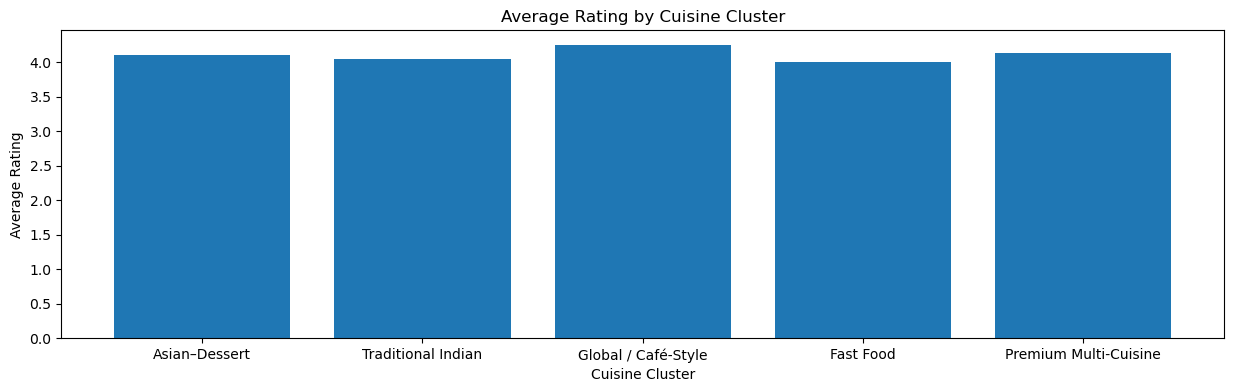

In [133]:
plt.figure(figsize=(15,4))
plt.bar(
    cluster_summary['cluster_name'],
    cluster_summary['avg_rating']
)
plt.xlabel('Cuisine Cluster')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine Cluster')
plt.show()


In [143]:
X_gwl_aligned = mlb.transform(gwl['cuisine_list'])


c:\Users\Shreya Marathe\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['bakery', 'bar food', 'beverages', 'cafe', 'cake', 'cuisine varies', 'healthy food', 'juices', 'kebab', 'momos', 'pancake', 'pasta', 'rolls', 'salad', 'sandwich', 'shake', 'shawarma', 'sichuan', 'snacks', 'wraps'] will be ignored
  warnings.warn(


In [144]:
# kmeans was trained on India data
gwl['cuisine_cluster'] = kmeans.predict(X_gwl_aligned)


In [145]:
gwl_cluster_validation = (
    gwl.groupby('cuisine_cluster')
    .agg(
        restaurant_count=('name', 'count'),
        avg_rating=('rating', 'mean'),
        avg_cost=('cost', 'mean')
    )
    .reset_index()
)

gwl_cluster_validation


,cuisine_cluster,restaurant_count,avg_rating,avg_cost
0,0,44,3.704545,296.590909
1,1,168,3.706548,470.535714
2,2,2,4.000000,600.000000
3,3,119,3.626891,347.058824
4,4,15,4.033333,973.333333


In [146]:
cluster_name_map = {
    0: 'Asian–Dessert',
    1: 'Traditional Indian',
    2: 'Global Café',
    3: 'Fast Food',
    4: 'Premium Multi-Cuisine'
}

gwl_cluster_validation['cluster_name'] = (
    gwl_cluster_validation['cuisine_cluster']
    .map(cluster_name_map)
)

gwl_cluster_validation


,cuisine_cluster,restaurant_count,avg_rating,avg_cost,cluster_name
0,0,44,3.704545,296.590909,Asian–Dessert
1,1,168,3.706548,470.535714,Traditional Indian
2,2,2,4.000000,600.000000,Global Café
3,3,119,3.626891,347.058824,Fast Food
4,4,15,4.033333,973.333333,Premium Multi-Cuisine


In [ ]:
#6️⃣ Entropy-Based Cuisine Diversity Index
#How diverse is the food culture of each city?

In [138]:
city_cuisine_counts = (
    ind.groupby(['city', 'main_cuisine'])
    .size()
    .reset_index(name='count')
)

city_cuisine_counts.head()


,city,main_cuisine,count
0,Agra,bakery and confectionary,1
1,Agra,chinese,4
2,Agra,coffee,2
3,Agra,fast food,7
4,Agra,finger food,5


In [139]:
city_cuisine_counts['total'] = (
    city_cuisine_counts
    .groupby('city')['count']
    .transform('sum')
)

city_cuisine_counts['p'] = (
    city_cuisine_counts['count'] / city_cuisine_counts['total']
)


In [140]:
import numpy as np

city_entropy = (
    city_cuisine_counts
    .groupby('city')
    .apply(lambda x: -np.sum(x['p'] * np.log(x['p'])))
    .reset_index(name='cuisine_diversity_index')
)

city_entropy.sort_values(
    by='cuisine_diversity_index',
    ascending=False
).head(10)


C:\Users\Shreya Marathe\AppData\Local\Temp\ipykernel_17100\2039882264.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: -np.sum(x['p'] * np.log(x['p'])))


,city,cuisine_diversity_index
2,Bangalore,2.895461
8,Gurgaon,2.835508
9,Hyderabad,2.690682
13,Kolkata,2.608800
16,Mumbai,2.562622
4,Chennai,2.487851
5,Delhi,2.468767
3,Chandigarh,2.259761
1,Ahmedabad,2.202207
18,Noida,2.160599


In [141]:
city_restaurant_count = (
    ind.groupby('city')
    .size()
    .reset_index(name='restaurant_count')
)

city_entropy = city_entropy.merge(
    city_restaurant_count,
    on='city'
)

city_entropy


,city,cuisine_diversity_index,restaurant_count
0,Agra,1.546372,75
1,Ahmedabad,2.202207,414
2,Bangalore,2.895461,1019
3,Chandigarh,2.259761,264
4,Chennai,2.487851,388
5,Delhi,2.468767,734
6,Ghaziabad,1.541289,50
7,Goa,1.956278,60
8,Gurgaon,2.835508,184
9,Hyderabad,2.690682,589


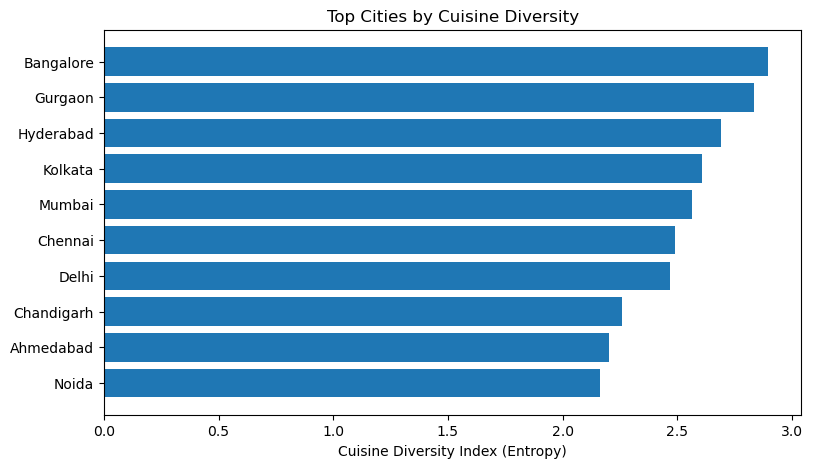

In [142]:
top_cities = city_entropy.sort_values(
    by='cuisine_diversity_index',
    ascending=False
).head(10)

plt.figure(figsize=(9,5))
plt.barh(
    top_cities['city'],
    top_cities['cuisine_diversity_index']
)
plt.xlabel('Cuisine Diversity Index (Entropy)')
plt.title('Top Cities by Cuisine Diversity')
plt.gca().invert_yaxis()
plt.show()


In [147]:
ind.head()

,name,location,locality,city,cuisine,rating,votes,cost,main_cuisine,cuisine_list,cuisine_category,cuisine_clean,cuisine_cluster
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,north indian,"[north indian, finger food, continental]",Traditional Indian,"north indian, finger food, continental",4
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,north indian,[north indian],Traditional Indian,north indian,1
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,finger food,"[finger food, north indian, italian, continent...",Fast Food & Casual,"finger food, north indian, italian, contine...",4
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,north indian,"[north indian, mediterranean, asian, italian, ...",Traditional Indian,"north indian, mediterranean, asian, italian...",2
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,mexican,"[mexican, american, italian]",Modern / Global,"mexican, american, italian",2


In [148]:
gwl.head()

,name,cuisine,link,main_cuisine,rating,cost,cuisine_list,cuisine_category,cuisine_cluster
0,Molecule,"Asian, Chinese, Bar Food",https://www.zomato.com/gwalior/molecule-lashka...,asian,4.4,1000,"[asian, chinese, bar food]",Modern / Global,0
1,Kwality Restaurant,"North Indian, Chinese, Continental, Biryani, D...",https://www.zomato.com/gwalior/kwality-restaur...,north indian,4.8,700,"[north indian, chinese, continental, biryani, ...",Traditional Indian,4
2,Muscle Vision Nutrition,"Continental, North Indian, Chinese, Sandwich, ...",https://www.zomato.com/gwalior/muscle-vision-n...,continental,3.5,450,"[continental, north indian, chinese, sandwich,...",Modern / Global,4
3,Starbucks Coffee,"Cafe, Beverages, Coffee",https://www.zomato.com/gwalior/starbucks-coffe...,cafe,4.4,900,"[cafe, beverages, coffee]",Desserts & Beverages,0
4,Xero Degrees,"Pizza, Fast Food, Chinese, Burger, Sandwich, I...",https://www.zomato.com/gwalior/xero-degrees-ci...,pizza,4.0,450,"[pizza, fast food, chinese, burger, sandwich, ...",Fast Food & Casual,3


In [150]:
gwl['link'].head(1)

0    https://www.zomato.com/gwalior/molecule-lashka...
Name: link, dtype: object

In [151]:
ind['data_source'] = 'India Dataset'
gwl['data_source'] = 'Gwalior Dataset'

In [152]:
print(ind.columns)
print(gwl.columns)


Index(['name', 'location', 'locality', 'city', 'cuisine', 'rating', 'votes',
       'cost', 'main_cuisine', 'cuisine_list', 'cuisine_category',
       'cuisine_clean', 'cuisine_cluster', 'data_source'],
      dtype='object')
Index(['name', 'cuisine', 'link', 'main_cuisine', 'rating', 'cost',
       'cuisine_list', 'cuisine_category', 'cuisine_cluster', 'data_source'],
      dtype='object')


In [153]:
final_columns = ['name','city','cuisine','main_cuisine','cuisine_category','cuisine_cluster','rating','cost','votes','data_source']


In [154]:
# Ensure missing columns exist
ind_aligned = ind.copy()

# India already has most columns, just select
ind_aligned = ind_aligned[final_columns]


In [155]:
gwl_aligned = gwl.copy()

# Add missing columns with NaN
gwl_aligned['city'] = 'Gwalior'
gwl_aligned['votes'] = None

# Reorder / select
gwl_aligned = gwl_aligned[final_columns]


In [156]:
combined = pd.concat([ind_aligned, gwl_aligned], ignore_index=True)


In [158]:
combined['data_source'].value_counts()



data_source
India Dataset      6593
Gwalior Dataset     348
Name: count, dtype: int64

In [159]:
combined.isnull().sum()

name                  0
city                  0
cuisine               0
main_cuisine          0
cuisine_category      0
cuisine_cluster       0
rating                0
cost                  0
votes               348
data_source           0
dtype: int64

In [163]:
with pd.ExcelWriter(r'C:\Users\Shreya Marathe\Desktop\Project\Restaurant Analysis\data\final_dashboard_data.xlsx') as writer:
    combined.to_excel(writer, sheet_name='Combined_Data', index=False)
    ind_aligned.to_excel(writer, sheet_name='India_Data', index=False)
    gwl_aligned.to_excel(writer, sheet_name='Gwalior_Data', index=False)
